# Sandbox notebook for data analysis and visualization

Author: Veikka Immonen

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from PIL import Image

import scienceplots
plt.style.use('science')
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 12
})

plt_original_resolution = plt.rcParams['figure.figsize']
plt_original_resolution

[3.5, 2.625]

## CytoSense

In [80]:
data_dir = Path('./data/CytoSense')
image_dir = data_dir / 'images'
fluorence_dir = data_dir / 'others'
annotations = pd.read_csv(data_dir / 'annotations.csv')
annotations

,X,class_name,has_image,has_fluorence
0,1,Aphanizomenon_flosaquae,True,False
1,2,Aphanizomenon_flosaquae,True,True
2,3,Aphanizomenon_flosaquae,True,True
3,4,Aphanizomenon_flosaquae,True,True
4,5,Aphanizomenon_flosaquae,True,True
...,...,...,...,...
14317,14353,Snowella-Woronichinia,True,False
14318,14354,Snowella-Woronichinia,True,False
14319,14355,Snowella-Woronichinia,True,False
14320,14356,Snowella-Woronichinia,True,False


### Statistics

Number of each instance, how many of them are purely multimodal?

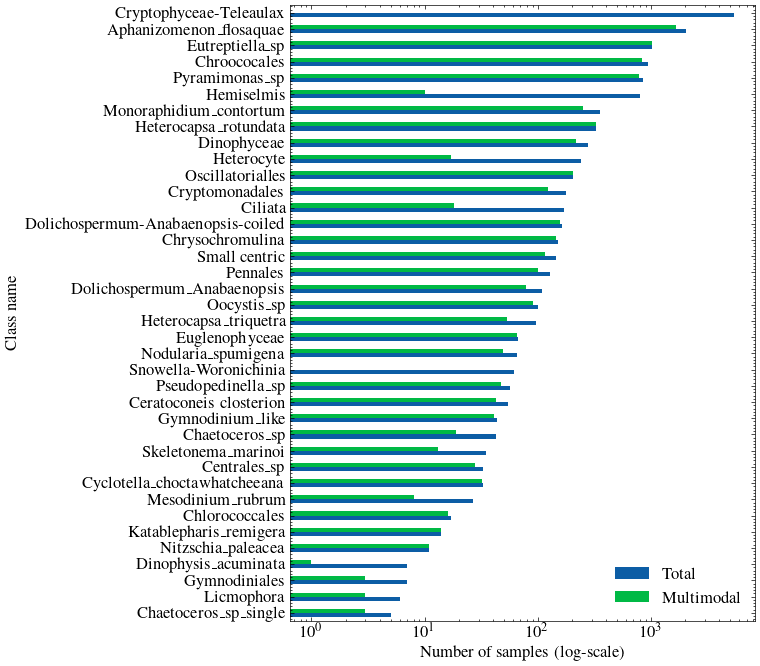

In [81]:
counter = Counter(annotations.class_name)

df = pd.DataFrame(
    index=annotations.class_name.unique(),
)

df['Total'] = counter.values()

for key in counter:
    counter[key] = 0

counter.update(annotations[annotations.has_fluorence == True].class_name)
df['Multimodal'] = counter.values()

df.sort_values('Total').plot(kind='barh', figsize=(6, 8))
plt.xlabel('Number of samples (log-scale)')
plt.ylabel('Class name')
plt.xscale('log')

plt.show()

### Visualization

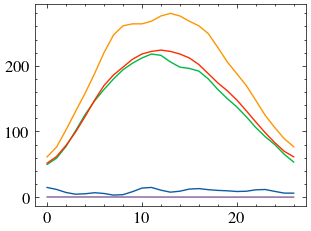

In [200]:
sample = annotations[annotations.iloc[:, -2:].T.all()].sample().X.item()

image = np.array(Image.open(image_dir / f"{sample}.jpg"))
fluorence = np.loadtxt(fluorence_dir / f"{sample}.csv", skiprows=1, delimiter=',')

h, w, _ = image.shape

x = np.arange(len(fluorence))

plt.plot(x, fluorence)
plt.show()